In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import model_selection


In [2]:
df = pd.read_csv('data.csv')


In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
df.shape

(918, 7)

In [5]:
df.head(5)

,Age,Gender,ChestPainType,MaxHR,ExerciseA2gi2a,FastingBS,target
0,40,1,2,172,2,2,0
1,49,2,3,156,2,2,1
2,37,1,2,98,2,2,0
3,48,2,4,108,1,2,1
4,54,1,3,122,2,2,0


In [6]:
df.sample(4)

,Age,Gender,ChestPainType,MaxHR,ExerciseA2gi2a,FastingBS,target
850,62,2,4,145,2,2,1
586,53,1,4,122,1,2,1
231,40,1,3,167,2,2,0
108,50,1,4,135,2,2,0


In [7]:
df.describe()

,Age,Gender,ChestPainType,MaxHR,ExerciseA2gi2a,FastingBS,target
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,1.210240,3.251634,136.809368,1.595861,1.766885,0.553377
std,9.432617,0.407701,0.931031,25.460334,0.490992,0.423046,0.497414
min,28.000000,1.000000,1.000000,60.000000,1.000000,1.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,1.000000,2.000000,0.000000
50%,54.000000,1.000000,4.000000,138.000000,2.000000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,156.000000,2.000000,2.000000,1.000000
max,77.000000,2.000000,4.000000,202.000000,2.000000,2.000000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Age             918 non-null    int64
 1   Gender          918 non-null    int64
 2   ChestPainType   918 non-null    int64
 3   MaxHR           918 non-null    int64
 4   ExerciseA2gi2a  918 non-null    int64
 5   FastingBS       918 non-null    int64
 6   target          918 non-null    int64
dtypes: int64(7)
memory usage: 50.3 KB


In [9]:
## No missing Values

In [10]:
info = ["age","1: male, 2: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic"," maximum heart rate achieved","exercise induced angina 1:yes, 2:No", "Dibaties: Yes, 2:No","Heart Disease 1: Yes, 0:No"]

for i in range(len(info)):
    print(df.columns[i]+":\t\t\t"+info[i])

Age:			age
Gender:			1: male, 2: female
ChestPainType:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
MaxHR:			 maximum heart rate achieved
ExerciseA2gi2a:			exercise induced angina 1:yes, 2:No
FastingBS:			Dibaties: Yes, 2:No
target:			Heart Disease 1: Yes, 0:No


In [11]:
df["target"].describe()

count    918.000000
mean       0.553377
std        0.497414
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

In [12]:
df["target"].unique()

array([0, 1], dtype=int64)

In [13]:
print(df.corr()["target"].abs().sort_values(ascending=False))

target            1.000000
ExerciseA2gi2a    0.494282
ChestPainType     0.471354
MaxHR             0.400421
Gender            0.305445
Age               0.282039
FastingBS         0.267291
Name: target, dtype: float64


In [14]:


import os
print(os.listdir())

import warnings
warnings.filterwarnings('ignore')


['.anaconda', '.android', '.bash_history', '.conda', '.condarc', '.continuum', '.dart_tool', '.designer', '.dotnet', '.eclipse', '.emulator_console_auth_token', '.gitignore', '.gradle', '.idea', '.ipfs', '.ipynb_checkpoints', '.ipython', '.jupyter', '.keras', '.local', '.m2', '.matplotlib', '.metadata', '.p2', '.packages', '.packettracer', '.python_history', '.spss', '.spyder-py3', '.templateengine', '.thumbnails', '.VirtualBox', '.vscode', '3D Objects', 'anaconda3', 'analysis_options.yaml', 'AndroidStudioProjects', 'app', 'AppData', 'Application Data', 'build', 'build.gradle', 'calculator.py', 'calculator.spec', 'cls', 'Contacts', 'Cookies', 'Creative Cloud Files', 'data.csv', 'Desktop', 'Documents', 'Downloads', 'Favorites', 'final heart pridictor.ipynb', 'get-pip.py', 'gradle', 'gradle.properties', 'gradlew', 'gradlew.bat', 'heart disease predictor .ipynb', 'heart.csv', 'HeartD.csv', 'heartData.csv', 'HeartDiseasePrediction -Copy1.ipynb', 'HeartDiseasePrediction .ipynb', 'HH.csv', '

1    508
0    410
Name: target, dtype: int64


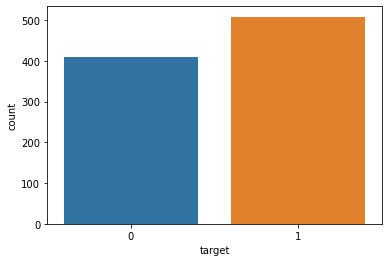

In [15]:
y = df["target"]

sns.countplot(y)


target_temp = df.target.value_counts()

print(target_temp)

In [16]:
print("Percentage of patience without heart problems: "+str(round(target_temp[0]*100/918,2)))
print("Percentage of patience with heart problems: "+str(round(target_temp[1]*100/918,2)))


Percentage of patience without heart problems: 44.66
Percentage of patience with heart problems: 55.34


In [17]:
from sklearn.model_selection import train_test_split

predictors = df.drop("target",axis=1)
target = df["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.15,random_state=0)

In [18]:
X_train.shape

(780, 6)

In [19]:
X_test.shape

(138, 6)

In [20]:
Y_train.shape

(780,)

In [21]:
Y_test.shape

(138,)

In [22]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(2000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)


rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)

In [23]:
Y_pred_rf.shape

(138,)

In [24]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

print("The model accuracy using Random Forest is: "+str(score_rf)+" %")

The model accuracy using Random Forest is: 83.33 %


In [25]:
import numpy as np


In [35]:
a=[22,2,1,98,2,2]

In [38]:
print(rf.predict([[22,2,1,98,2,2]]))

[0]


In [42]:
import pickle
with open('model_pkl', 'wb') as files:
    pickle.dump(rf, files)

In [43]:
# load saved model
with open('model_pkl' , 'rb') as f:
    lr = pickle.load(f)

In [45]:

lr.predict([[22,2,1,98,2,2]]) # similar

array([0], dtype=int64)